<a href="https://colab.research.google.com/github/ganeshmp01/DS-Classwork/blob/main/Text_extract_from_pdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U pypdfium2

In [2]:
import pypdfium2 as pdfium
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [4]:
def convert_pdf_to_images(file_path, scale=300/72):

    pdf_file = pdfium.PdfDocument(file_path)
    page_indices = [i for i in range(len(pdf_file))]

    renderer = pdf_file.render(
        pdfium.PdfBitmap.to_pil,
        page_indices = page_indices,
        scale = scale,
    )

    list_final_images = []

    for i, image in zip(page_indices, renderer):

        image_byte_array = BytesIO()
        image.save(image_byte_array, format='jpeg', optimize=True)
        image_byte_array = image_byte_array.getvalue()
        list_final_images.append(dict({i:image_byte_array}))

    return list_final_images

In [5]:
def display_images(list_dict_final_images):

    all_images = [list(data.values())[0] for data in list_dict_final_images]

    for index, image_bytes in enumerate(all_images):

        image = Image.open(BytesIO(image_bytes))
        figure = plt.figure(figsize = (image.width / 100, image.height / 100))

        plt.title(f"----- Page Number {index+1} -----")
        plt.imshow(image)
        plt.axis("off")
        plt.show()

In [6]:
convert_pdf_to_images = convert_pdf_to_images('Experimentation_file.pdf')

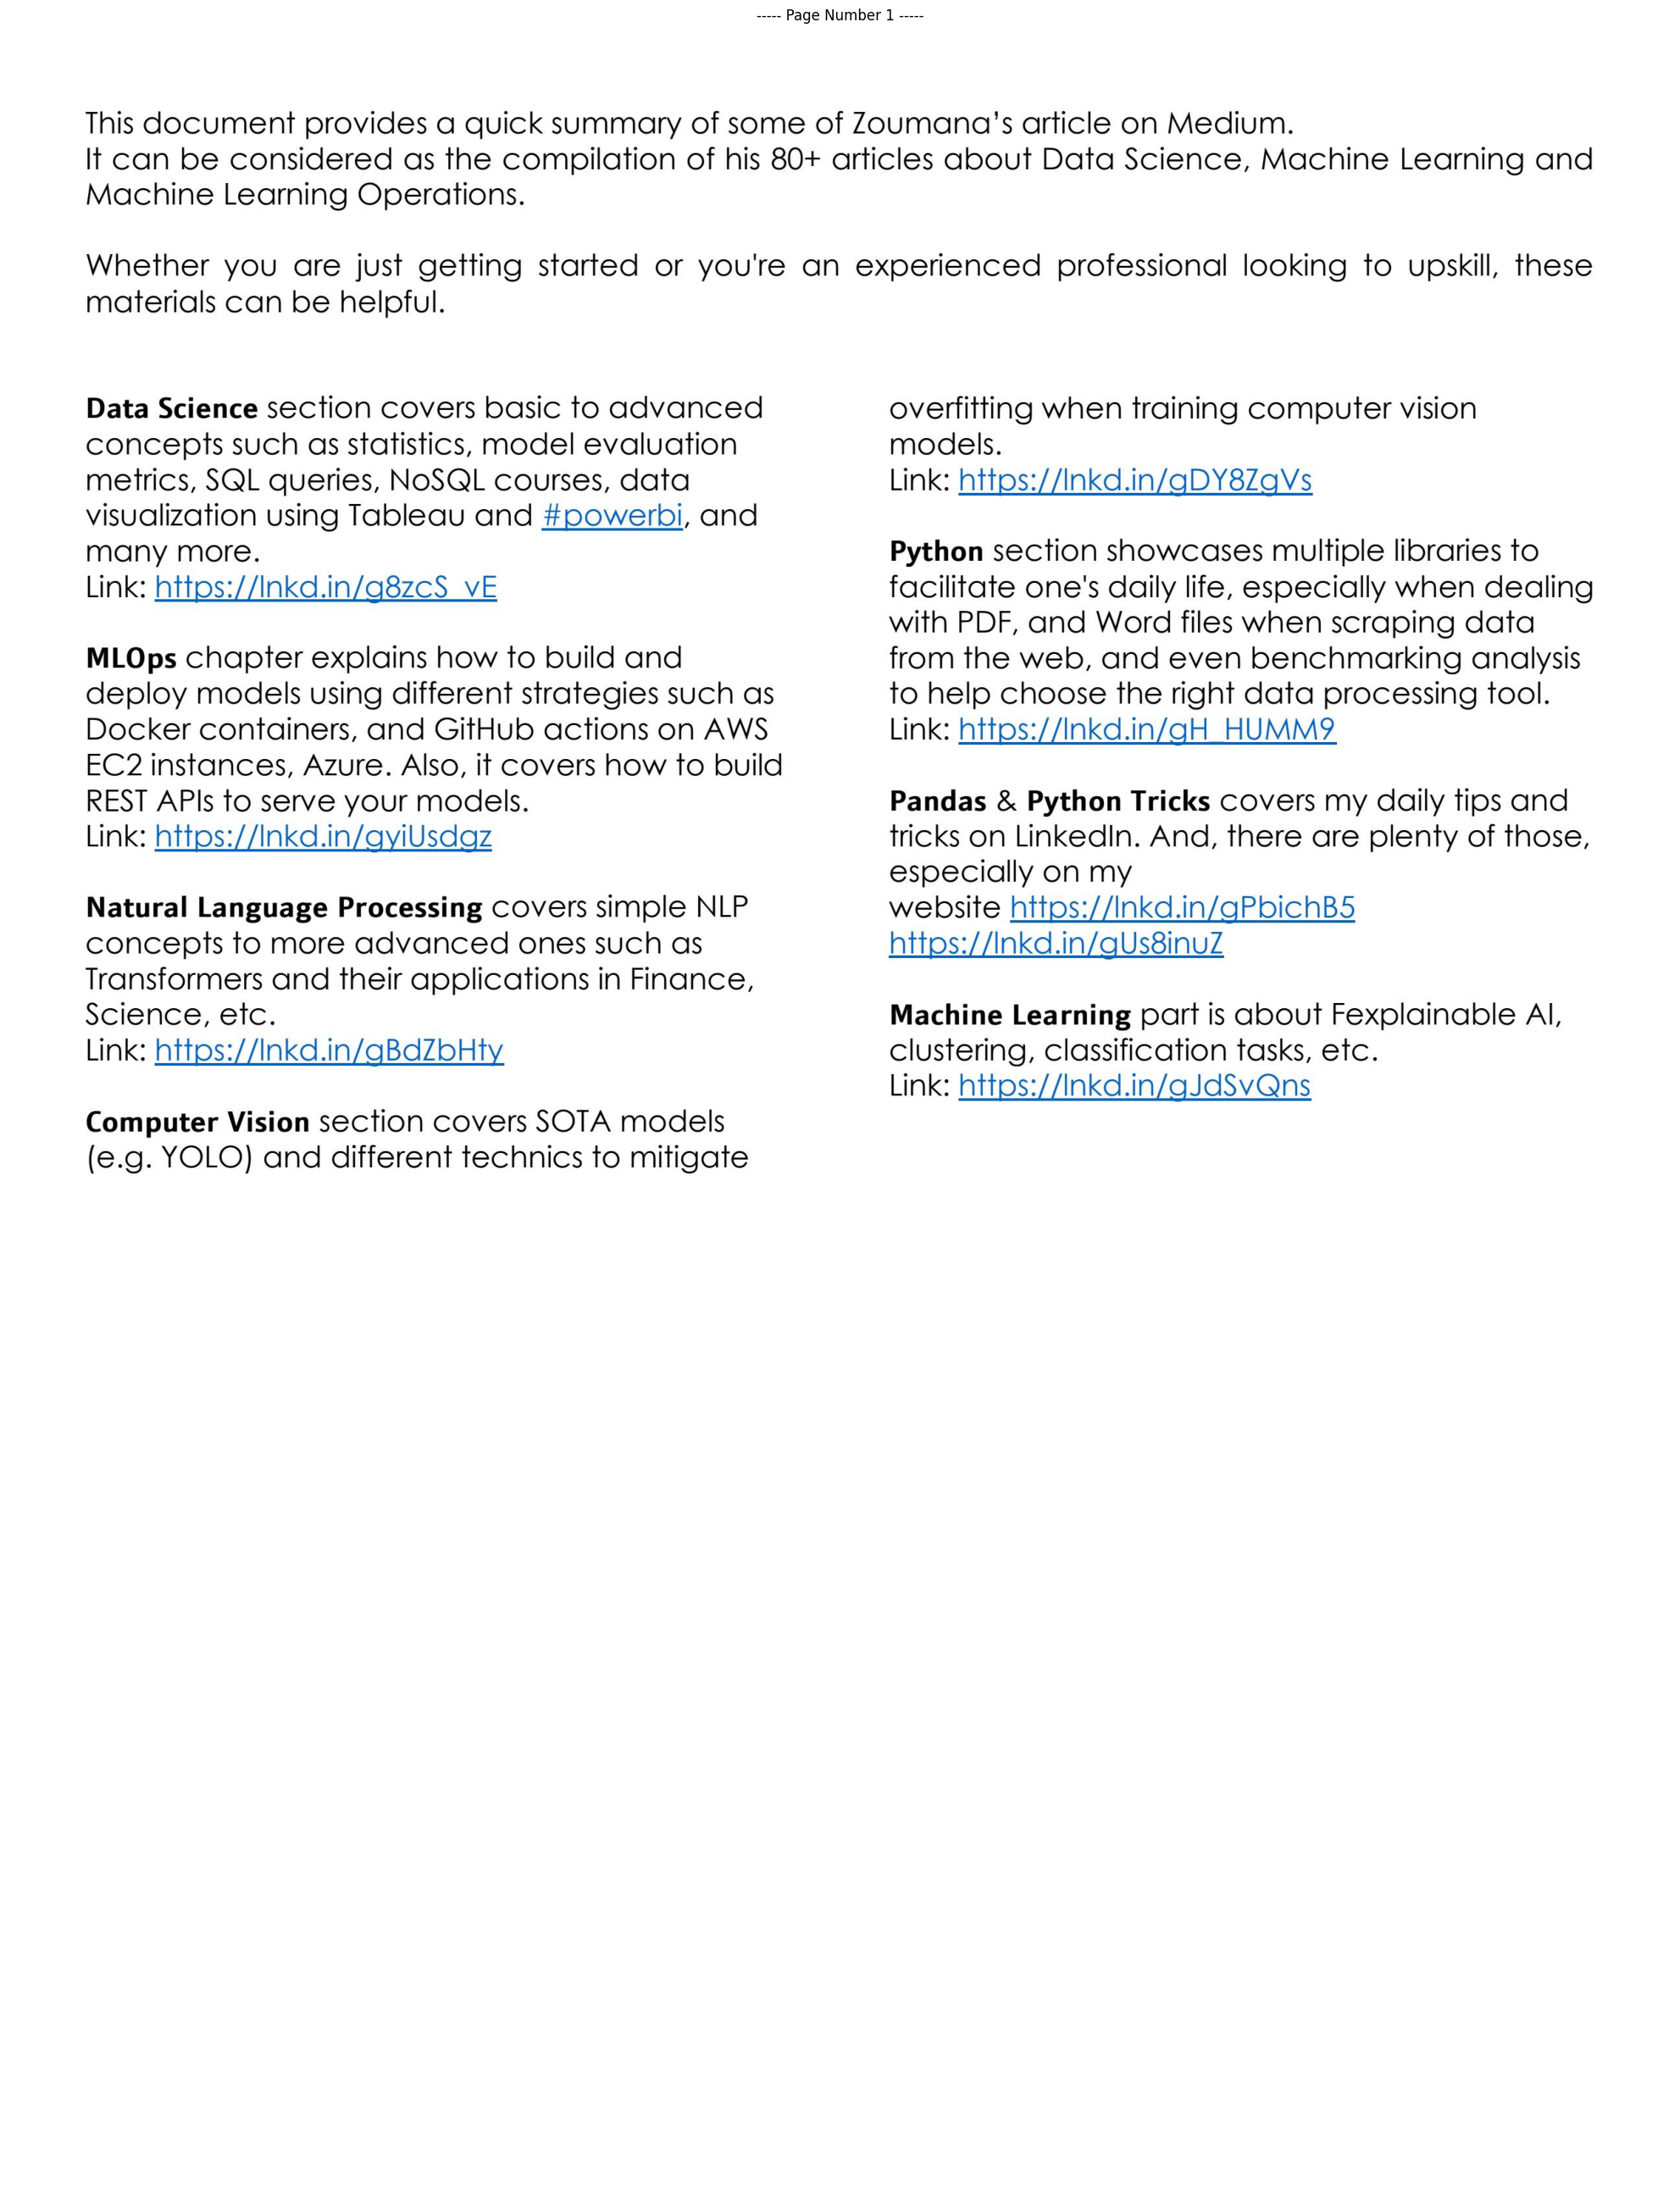

In [7]:
display_images(convert_pdf_to_images)

In [8]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.1 MB/s eta 0:00:00


In [9]:
from PyPDF2 import PdfReader

In [10]:
def extract_text_with_pyPDF(PDF_File):

    pdf_reader = PdfReader(PDF_File)

    raw_text = ''

    for i, page in enumerate(pdf_reader.pages):

        text = page.extract_text()
        if text:
            raw_text += text

    return raw_text

In [11]:
text_with_pyPDF = extract_text_with_pyPDF("Experimentation_file.pdf")
print(text_with_pyPDF)

This document provides a quick summary of some of Zoumana’s article on Medium.  
It can be considered as the compilation of his 80+ articles about Data Science, Machine Learning and 
Machine Learning Operations.  
 
Whether you are just getting started or you're an experienced professional looking to upskill, these 
materials can be helpfu l. 
 
 
𝗗𝗮𝘁𝗮  𝗦𝗰𝗶𝗲𝗻𝗰𝗲  section covers basic to advanced  
concepts such as statistics, model evaluation 
metrics, SQL queries, NoSQL courses, data 
visualization using  Tableau  and #powerbi , and 
many more.  
Link: https://lnkd.in/g8z cS_vE  
 
𝗠𝗟𝗢𝗽𝘀  chapter explains how to build and 
deploy models using different strategies such as 
Docker containers, and GitHub actions on AWS 
EC2 instances, Azure. Also, it covers how to build 
REST APIs to serve your  models.  
Link: https://lnkd.in/gyiUsdgz  
 
𝗡𝗮𝘁𝘂𝗿𝗮𝗹  𝗟𝗮𝗻𝗴𝘂𝗮𝗴𝗲  𝗣𝗿𝗼𝗰𝗲𝘀𝘀𝗶𝗻𝗴  covers simple NLP 
concepts to more advanced ones such as 
Transformers and their applicat ions in Finance, 
Science, et

In [12]:
!pip install langchain

In [13]:
pip show langchain

Name: langchain
Version: 0.2.10
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, async-timeout, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-community


In [13]:
pip install unstructured

In [14]:
!pip install -U langchain-community

In [15]:
from langchain.document_loaders import UnstructuredFileLoader

def extract_text_with_langchain_pdf(pdf_file):

    loader = UnstructuredFileLoader(pdf_file)
    documents = loader.load()
    pdf_pages_content = '\n'.join(doc.page_content for doc in documents)

    return pdf_pages_content

In [10]:
!pip install "unstructured[pdf]"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.7/274.7 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 65.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 93.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 93.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 80.3 MB/s eta 0

In [16]:
text_with_langchain_files = extract_text_with_langchain_pdf("Experimentation_file.pdf")
print(text_with_langchain_files)

/usr/local/lib/python3.10/dist-packages/pypdf/_crypt_providers/_cryptography.py:32: CryptographyDeprecationWarning: ARC4 has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.ARC4 and will be removed from this module in 48.0.0.
  from cryptography.hazmat.primitives.ciphers.algorithms import AES, ARC4


This document provides a quick summary of some of Zoumana’s article on Medium. It can be considered as the compilation of his 80+ articles about Data Science, Machine Learning and Machine Learning Operations.

Whether you are just getting started or you're an experienced professional looking to upskill, these materials can be helpful.

𝗗𝗮𝘁𝗮 𝗦𝗰𝗶𝗲𝗻𝗰𝗲 section covers basic to advanced concepts such as statistics, model evaluation metrics, SQL queries, NoSQL courses, data visualization using Tableau and #powerbi, and many more. Link: https://lnkd.in/g8zcS_vE

𝗠𝗟𝗢𝗽𝘀 chapter explains how to build and deploy models using different strategies such as Docker containers, and GitHub actions on AWS EC2 instances, Azure. Also, it covers how to build REST APIs to serve your models. Link: https://lnkd.in/gyiUsdgz

𝗡𝗮𝘁𝘂𝗿𝗮𝗹 𝗟𝗮𝗻𝗴𝘂𝗮𝗴𝗲 𝗣𝗿𝗼𝗰𝗲𝘀𝘀𝗶𝗻𝗴 covers simple NLP concepts to more advanced ones such as Transformers and their applications in Finance, Science, etc. Link: https://lnkd.in/gBdZbHty

overfitting